In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

### Exploratory Data Analysis

Let's start by uploading our data into a pandas dataframe and taking a look at it

In [83]:
cover_data = pd.read_csv('cover_data.csv')

In [84]:
cover_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [85]:
cover_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [86]:
cover_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

No Null values! Fantastic! Seems like while columns are all intergers, some are categorical (soil types are either 0 or 1) and some are continuous (elevation ranges from 1859 to 3858)

Class is the target variable for this dataset, lets check out the breakdown of how many tree are in each class.

In [87]:
cover_data['class'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

In [94]:
tree_name_dict = {1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4 : 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas-fir', 7: 'Krummholz'}
class_names = cover_data['class'].map(tree_name_dict)
class_names.value_counts()

Lodgepole Pine       283301
Spruce/Fir           211840
Ponderosa Pine        35754
Krummholz             20510
Douglas-fir           17367
Aspen                  9493
Cottonwood/Willow      2747
Name: class, dtype: int64

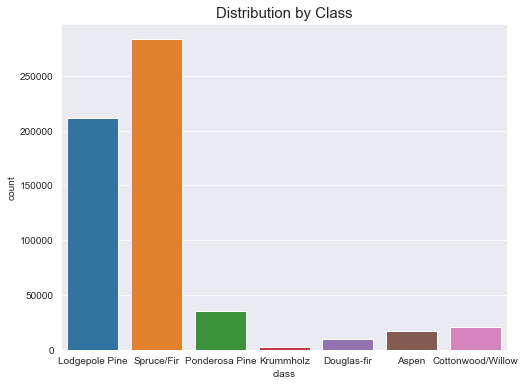

In [115]:
fig, ax = plt.subplots(figsize=(8,6))
cp = sns.countplot(x='class', data=cover_data)
plt.title('Distribution by Class', fontsize=15)
ax.set_xticklabels(['Lodgepole Pine', 'Spruce/Fir', 'Ponderosa Pine', 'Krummholz', 'Douglas-fir', 'Aspen', 'Cottonwood/Willow']);

Lodgepole Pine and Spruce/Fir are clearly the most common of the group!

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


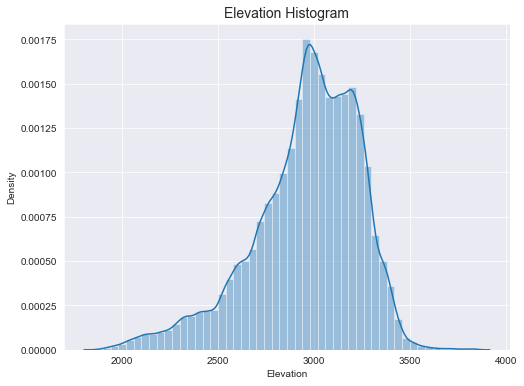

In [46]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.distplot(cover_data['Elevation'])
plt.title('Elevation Histogram', fontsize=14);

Now let's check out the elvation distribution by class type with a boxplot

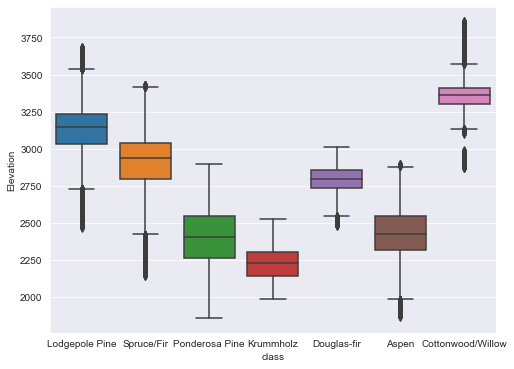

In [116]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='class', y='Elevation', data=cover_data)
ax.set_xticklabels(['Lodgepole Pine', 'Spruce/Fir', 'Ponderosa Pine', 'Krummholz', 'Douglas-fir', 'Aspen', 'Cottonwood/Willow']);

Our boxplot shows Krummholz and Spruce/Fir trees have highest elevation on average, and Ponderosa Pine, Douglas Fir and Cottonwood/Willow are the lowest on average

In [52]:
wilderness_data = cover_data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']]

In [60]:
wilderness_sums = wilderness_data.sum()
wilderness_sums

Wilderness_Area1    260796
Wilderness_Area2     29884
Wilderness_Area3    253364
Wilderness_Area4     36968
dtype: int64

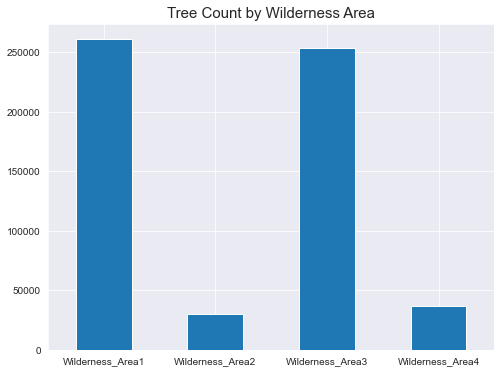

In [68]:
fig, ax = plt.subplots(figsize=(8,6))
wilderness_sums.plot(kind='bar')
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0)
plt.title('Tree Count by Wilderness Area', fontsize=15);

### Preprocessing

In [95]:
cover_data['class'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [96]:
features = cover_data.drop('class', axis=1)
target = cover_data['class']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [98]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [99]:
X_train_scaled.shape

(435759, 54)

### Build Model

In [104]:
def build_model(X):
    model = Sequential()
    # Input Layer
    model.add(InputLayer(input_shape = (X.shape[1],)))
    # Hidden Layers
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    # Output Layer
    model.add(Dense(8, activation = 'softmax'))
    opt = Adam(learning_rate = .0001)
    model.compile(loss = "sparse_categorical_crossentropy",
                 metrics = ['accuracy'],
                 optimizer = opt)
    model.summary()
    return model
    

In [105]:
model = build_model(X_train_scaled)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               7040      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 136       
Total params: 18,040
Trainable params: 18,040
Non-trainable params: 0
_________________________________________________________________


### Fit Model

In [133]:
es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=50)

In [134]:
history = model.fit(X_train_scaled, y_train, epochs = 200, batch_size = 500, verbose =1, validation_split = .2, callbacks = [es])

Epoch 1/200
698/698 [==============================] - 3s 4ms/step - loss: 0.4494 - accuracy: 0.8105 - val_loss: 0.4511 - val_accuracy: 0.8094
Epoch 2/200
698/698 [==============================] - 3s 4ms/step - loss: 0.4459 - accuracy: 0.8121 - val_loss: 0.4475 - val_accuracy: 0.8112
Epoch 3/200
698/698 [==============================] - 2s 4ms/step - loss: 0.4422 - accuracy: 0.8142 - val_loss: 0.4454 - val_accuracy: 0.8131
Epoch 4/200
698/698 [==============================] - 3s 4ms/step - loss: 0.4387 - accuracy: 0.8159 - val_loss: 0.4407 - val_accuracy: 0.8150
Epoch 5/200
698/698 [==============================] - 3s 4ms/step - loss: 0.4354 - accuracy: 0.8176 - val_loss: 0.4376 - val_accuracy: 0.8170
Epoch 6/200
698/698 [==============================] - 3s 4ms/step - loss: 0.4322 - accuracy: 0.8189 - val_loss: 0.4378 - val_accuracy: 0.8153
Epoch 7/200
698/698 [==============================] - 3s 4ms/step - loss: 0.4288 - accuracy: 0.8210 - val_loss: 0.4323 - val_accuracy: 0.8186

In [135]:
preds = model.predict(X_test_scaled)

In [136]:
y_pred = np.argmax(preds, axis=1)

In [137]:
y_test

250728    1
246788    2
407714    2
25713     2
21820     2
         ..
191602    1
93564     2
577186    3
406499    1
308650    6
Name: class, Length: 145253, dtype: int64

In [138]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.87      0.83      0.85     53006
           2       0.85      0.91      0.88     70776
           3       0.78      0.87      0.82      8909
           4       0.78      0.64      0.70       651
           5       0.78      0.36      0.50      2473
           6       0.73      0.55      0.63      4373
           7       0.89      0.85      0.87      5065

    accuracy                           0.85    145253
   macro avg       0.81      0.72      0.75    145253
weighted avg       0.85      0.85      0.85    145253



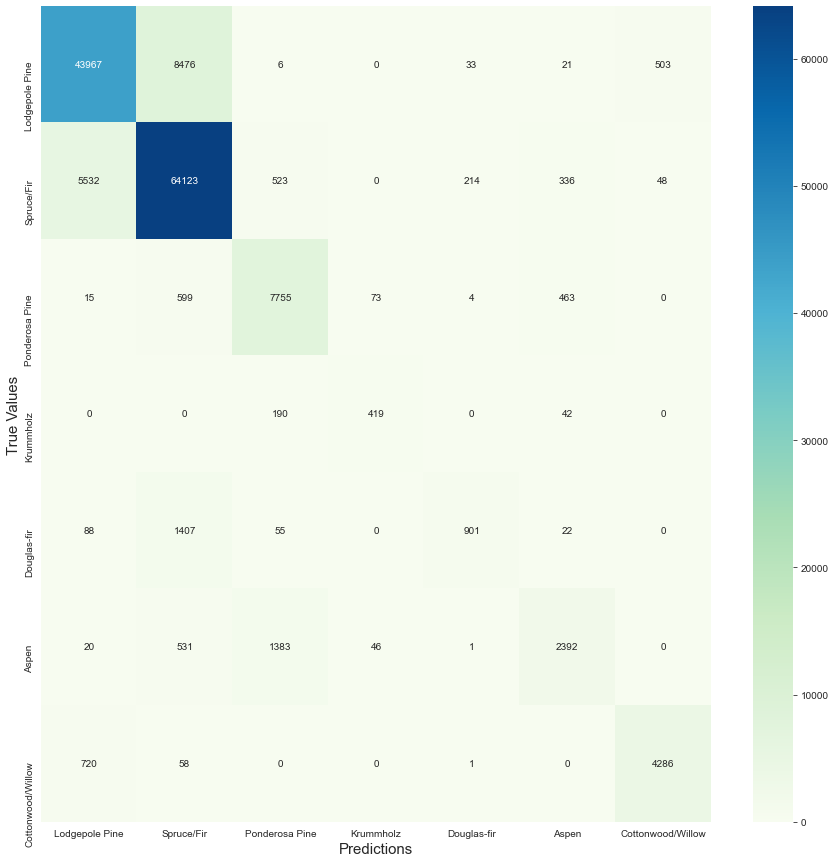

In [139]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(15,15))
s = sns.heatmap(cm, annot=True, cmap='GnBu', fmt='g', xticklabels=['Lodgepole Pine', 'Spruce/Fir', 'Ponderosa Pine', 'Krummholz', 'Douglas-fir', 'Aspen', 'Cottonwood/Willow'],
               yticklabels=['Lodgepole Pine', 'Spruce/Fir', 'Ponderosa Pine', 'Krummholz', 'Douglas-fir', 'Aspen', 'Cottonwood/Willow'])
s.set_xlabel("Predictions", fontsize=15)
s.set_ylabel('True Values', fontsize=15);

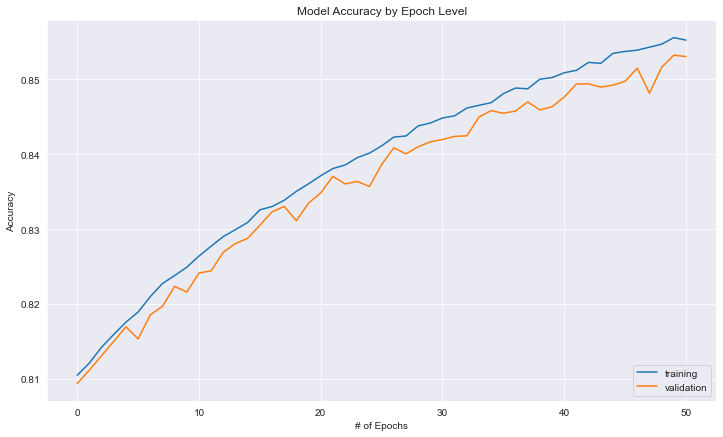

In [140]:
#plot accuracy by epoch

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Model Accuracy by Epoch Level')
ax.set_ylabel('Accuracy')
ax.set_xlabel('# of Epochs')
ax.legend(['training', 'validation'], loc='lower right');
